<a href="https://colab.research.google.com/github/GRUPO3TFM/TFM/blob/main/Modelo_KNN_CARLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargado de Archivos de Clima, Trenes y Preprocesado

### 1. Cargamos desde nuestro entorno local todos los archivos de lluvias, temperaturas y viento al Colab.

In [83]:
from google.colab import files
uploaded = files.upload()


Saving Extreme_wind_Leipzig_02928.txt to Extreme_wind_Leipzig_02928.txt
Saving temperature_Wuppertal_05717.txt to temperature_Wuppertal_05717 (1).txt
Saving temperature_Stuttgart_04928.txt to temperature_Stuttgart_04928 (1).txt
Saving temperature_Nürnberg_03668.txt to temperature_Nürnberg_03668 (1).txt
Saving temperature_Münster(Westf)_01766.txt to temperature_Münster(Westf)_01766 (1).txt
Saving temperature_Munchen_03379.txt to temperature_Munchen_03379 (1).txt
Saving temperature_Leipzig_02928.txt to temperature_Leipzig_02928 (1).txt
Saving temperature_Koln_02968.txt to temperature_Koln_02968 (1).txt
Saving temperature_Hannover_02014.txt to temperature_Hannover_02014 (1).txt
Saving temperature_Hamburg_01975.txt to temperature_Hamburg_01975 (1).txt
Saving temperature_Frankfurt_am_Main_01420.txt to temperature_Frankfurt_am_Main_01420 (1).txt
Saving temperature_Essen_01303.txt to temperature_Essen_01303 (1).txt
Saving temperature_Düsseldorf_01078.txt to temperature_Düsseldorf_01078 (1).tx

### 2. Limpiamos y Preprocesamos Dataframe Lluvias por hora y ciudad.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import os
import numpy as np

In [7]:
uploaded_files = glob.glob("/content/Precipitacion_*.txt")

dataframes = []

def extract_city(file_name):
    base_name = os.path.basename(file_name)
    parts = base_name.split('_')
    city = "_".join(parts[1:-1])
    return city

for file_path in uploaded_files:
    try:
        df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)
        city = extract_city(file_path)
        df['city'] = city

        df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H', errors='coerce')
        df = df[df['MESS_DATUM'] >= '2024-07-07']

        if not df.empty:
            df = df[['MESS_DATUM', 'R1', 'city']]
            df.rename(columns={'MESS_DATUM': 'datetime', 'R1': 'lluvia_mm'}, inplace=True)
            dataframes.append(df)
    except Exception as e:
        continue

if dataframes:
    rain_data = pd.concat(dataframes, ignore_index=True)
    display(rain_data.head())
    display(rain_data.describe())
    distinct_cities = rain_data['city'].unique()
    display(distinct_cities)
else:
    print("No se encontraron archivos válidos para concatenar.")

,datetime,lluvia_mm,city
0,2024-07-07 00:00:00,0.0,Münster(Westf)
1,2024-07-07 01:00:00,0.0,Münster(Westf)
2,2024-07-07 02:00:00,0.0,Münster(Westf)
3,2024-07-07 03:00:00,0.0,Münster(Westf)
4,2024-07-07 04:00:00,0.0,Münster(Westf)


,datetime,lluvia_mm
count,54734,54734.000000
mean,2024-08-04 11:40:33.061716480,-0.047758
min,2024-07-07 00:00:00,-999.000000
25%,2024-07-21 06:00:00,0.000000
50%,2024-08-04 12:00:00,0.000000
75%,2024-08-18 18:00:00,0.000000
max,2024-09-02 06:00:00,29.400000
std,NaN,12.102916


array(['Münster(Westf)', 'Stuttgart', 'Dortmund', 'Duisburg', 'Bremen',
       'Wuppertal', 'Bielefeld', 'Koln', 'Nürnberg', 'Munchen', 'Berlin',
       'Bonn', 'Hamburg', 'Bochum', 'Hannover', 'Düsseldorf', 'Dresden',
       'Frankfurt_am_Main', 'Essen', 'Leipzig'], dtype=object)

### 3. Limpiamos y Preprocesamos Dataframe Vientos por hora y ciudad.

In [8]:
uploaded_files = glob.glob("/content/Extreme_wind_*.txt")

dataframes = []

def extract_city(file_name):
    base_name = os.path.basename(file_name)
    parts = base_name.split('_')
    city = "_".join(parts[2:-1])
    return city

for file_path in uploaded_files:
    try:
        df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)
        city = extract_city(file_path)
        df['city'] = city

        df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H', errors='coerce')
        df = df[df['MESS_DATUM'] >= '2024-07-07']

        if not df.empty:
            df = df[['MESS_DATUM', 'FX_911', 'city']]
            df.rename(columns={'MESS_DATUM': 'datetime', 'FX_911': 'windspeed_mps'}, inplace=True)
            dataframes.append(df)
    except Exception as e:
        continue

if dataframes:
    wind_data = pd.concat(dataframes, ignore_index=True)
    display(wind_data.head())
    display(wind_data.describe())
    distinct_cities = wind_data['city'].unique()
    display(distinct_cities)
else:
    print("No se encontraron archivos válidos para concatenar.")

,datetime,windspeed_mps,city
0,2024-07-07 00:00:00,7.5,Essen
1,2024-07-07 01:00:00,7.5,Essen
2,2024-07-07 02:00:00,8.0,Essen
3,2024-07-07 03:00:00,6.9,Essen
4,2024-07-07 04:00:00,4.9,Essen


,datetime,windspeed_mps
count,55926,55926.000000
mean,2024-08-04 14:34:58.744769792,5.357415
min,2024-07-07 00:00:00,-999.000000
25%,2024-07-21 09:00:00,3.400000
50%,2024-08-04 15:00:00,5.100000
75%,2024-08-18 21:00:00,7.200000
max,2024-09-04 23:00:00,28.000000
std,NaN,15.004357


array(['Essen', 'Dresden', 'Bielefeld', 'Bonn', 'Duisburg', 'Bremen',
       'Berlin', 'Koln', 'Düsseldorf', 'Bochum', 'Nürnberg', 'Dortmund',
       'Hannover', 'Frankfurt_am_Main', 'Hamburg', 'Münster(Westf)',
       'Munchen', 'Stuttgart', 'Wuppertal', 'Leipzig'], dtype=object)

### 4. Limpiamos y Preprocesamos Dataframe para Temperaturas por hora y ciudad.

In [9]:
uploaded_files = glob.glob("/content/temperature_*.txt")

dataframes = []

def extract_city(file_name):
    base_name = os.path.basename(file_name)
    parts = base_name.split('_')
    city = "_".join(parts[1:-1])  # Ajuste para extraer correctamente el nombre de la ciudad
    return city

for file_path in uploaded_files:
    try:
        df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)
        city = extract_city(file_path)
        df['city'] = city

        df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H%M', errors='coerce')
        df = df[df['MESS_DATUM'] >= '2024-07-07']

        required_columns = ['TX_10', 'TX5_10', 'TN_10', 'TN5_10']
        if all(col in df.columns for col in required_columns):
            df = df[['MESS_DATUM', 'TX_10', 'TX5_10', 'TN_10', 'TN5_10', 'city']]
            df.rename(columns={
                'MESS_DATUM': 'datetime',
                'TX_10': 'max_temp_2m_C',
                'TX5_10': 'max_temp_5cm_C',
                'TN_10': 'min_temp_2m_C',
                'TN5_10': 'min_temp_5cm_C'
            }, inplace=True)
            df.replace(-999, np.nan, inplace=True)

            df_num = df.drop(columns=['city'])
            df_num.set_index('datetime', inplace=True)
            df_num = df_num.resample('H').mean().reset_index()
            df_num['city'] = city

            dataframes.append(df_num)
        else:
            print(f"El archivo {file_path} no contiene las columnas necesarias y será omitido.")
    except Exception as e:
        print(f"Error al procesar el archivo {file_path}: {e}")

if dataframes:
    temp_data = pd.concat(dataframes, ignore_index=True)
    display(temp_data.head())
    display(temp_data.describe())
    distinct_cities = temp_data['city'].unique()
    display(distinct_cities)
else:
    print("No se encontraron archivos válidos para concatenar.")

,datetime,max_temp_2m_C,max_temp_5cm_C,min_temp_2m_C,min_temp_5cm_C,city
0,2024-07-07 00:00:00,16.166667,NaN,15.933333,15.083333,Nürnberg
1,2024-07-07 01:00:00,15.483333,NaN,15.316667,14.350000,Nürnberg
2,2024-07-07 02:00:00,15.050000,NaN,14.883333,13.583333,Nürnberg
3,2024-07-07 03:00:00,14.516667,NaN,14.350000,13.083333,Nürnberg
4,2024-07-07 04:00:00,14.366667,NaN,14.266667,13.483333,Nürnberg


,datetime,max_temp_2m_C,max_temp_5cm_C,min_temp_2m_C,min_temp_5cm_C
count,54732,54718.000000,0.0,54718.000000,54718.000000
mean,2024-08-04 11:39:02.249506816,20.453356,NaN,20.073360,20.390607
min,2024-07-07 00:00:00,5.733333,NaN,5.616667,4.183333
25%,2024-07-21 06:00:00,17.250000,NaN,16.983333,16.100000
50%,2024-08-04 12:00:00,20.066667,NaN,19.716667,19.550000
75%,2024-08-18 18:00:00,23.366667,NaN,22.866667,24.350000
max,2024-09-02 05:00:00,35.233333,NaN,34.483333,40.650000
std,NaN,4.556380,NaN,4.458103,5.958889


array(['Nürnberg', 'Berlin', 'Leipzig', 'Essen', 'Duisburg',
       'Münster(Westf)', 'Frankfurt_am_Main', 'Wuppertal', 'Bochum',
       'Düsseldorf', 'Munchen', 'Dresden', 'Stuttgart', 'Bremen', 'Bonn',
       'Hannover', 'Bielefeld', 'Hamburg', 'Dortmund', 'Koln'],
      dtype=object)

### 5. Estandarizamos los nombres de las diversas ciudades en los dataframes para que matcheen a aquellas en BigQuery

In [10]:
city_mapping = {

    'Münster(Westf)Hbf': 'Münster(Westf)',
    # Add other mappings as needed
}

In [12]:
hbf_mapping = {
    'Düsseldorf Hbf': 'Düsseldorf',
    'Dortmund Hbf': 'Dortmund',
    'Hamburg Hbf': 'Hamburg',
    'Köln Hbf': 'Koln',
    'Frankfurt(Main)Hbf': 'Frankfurt_am_Main',
    'Hannover Hbf': 'Hannover',
    'Berlin Hbf': 'Berlin',
    'Bremen Hbf': 'Bremen',
    'Nürnberg Hbf': 'Nürnberg',
    'Bochum Hbf': 'Bochum',
    'Wuppertal Hbf': 'Wuppertal',
    'Bonn Hbf': 'Bonn',
    'Leipzig Hbf': 'Leipzig',
    'Bielefeld Hbf': 'Bielefeld',
    'Stuttgart Hbf': 'Stuttgart',
    'Essen Hbf': 'Essen',
    'Duisburg Hbf': 'Duisburg',
    'Münich Hbf': 'Munchen',
    'Münster(Westf)Hbf': 'Münster(Westf)',
    'Dresden Hbf': 'Dresden'
}

def normalize_city_names(city_series):
    reverse_mapping = {v: k for k, v in hbf_mapping.items()}
    return city_series.map(reverse_mapping).fillna(city_series)

for df in [rain_data, wind_data, temp_data]:
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])

rain_data['city'] = normalize_city_names(rain_data['city'])
wind_data['city'] = normalize_city_names(wind_data['city'])
temp_data['city'] = normalize_city_names(temp_data['city'])

print("Rain Data Normalized:")
print(rain_data.head())
print("\nWind Data Normalized:")
print(wind_data.head())
print("\nTemp Data Normalized:")
print(temp_data.head())

Rain Data Normalized:
             datetime  lluvia_mm               city
0 2024-07-07 00:00:00        0.0  Münster(Westf)Hbf
1 2024-07-07 01:00:00        0.0  Münster(Westf)Hbf
2 2024-07-07 02:00:00        0.0  Münster(Westf)Hbf
3 2024-07-07 03:00:00        0.0  Münster(Westf)Hbf
4 2024-07-07 04:00:00        0.0  Münster(Westf)Hbf

Wind Data Normalized:
             datetime  windspeed_mps       city
0 2024-07-07 00:00:00            7.5  Essen Hbf
1 2024-07-07 01:00:00            7.5  Essen Hbf
2 2024-07-07 02:00:00            8.0  Essen Hbf
3 2024-07-07 03:00:00            6.9  Essen Hbf
4 2024-07-07 04:00:00            4.9  Essen Hbf

Temp Data Normalized:
             datetime  max_temp_2m_C  max_temp_5cm_C  min_temp_2m_C  \
0 2024-07-07 00:00:00      16.166667             NaN      15.933333   
1 2024-07-07 01:00:00      15.483333             NaN      15.316667   
2 2024-07-07 02:00:00      15.050000             NaN      14.883333   
3 2024-07-07 03:00:00      14.516667            

### 6. Importamos los datos de trenes desde BigQuery, filtrando para los dias que tenemos datos de Clima (desde el 7 de Julio hasta el 30 de Agosto 2024).

In [13]:
from google.colab import auth
auth.authenticate_user()

In [14]:
%load_ext google.colab.data_table

In [15]:
 %%bigquery train_data --project tfmil3

SELECT
  *
FROM `tfmil3.datos_trenes.trenes_agregado_por_hora`
WHERE Date <= "2024-09-01"

Query is running:   0%|          |

Downloading:   0%|          |

In [16]:
train_data.tail(70)

,date,Hbf,datetime_hour,hour_only,total_trenes,avg_retraso,count_retraso,count_cancelled
25878,2024-09-01,Nürnberg Hbf,2024-09-01 01:00:00+00:00,1,11,7.000000,5,0
25879,2024-09-01,Nürnberg Hbf,2024-09-01 02:00:00+00:00,2,5,2.000000,1,0
25880,2024-09-01,Nürnberg Hbf,2024-09-01 04:00:00+00:00,4,1,NaN,0,0
25881,2024-09-01,Nürnberg Hbf,2024-09-01 05:00:00+00:00,5,9,1.000000,2,0
25882,2024-09-01,Nürnberg Hbf,2024-09-01 06:00:00+00:00,6,20,5.714286,7,0
...,...,...,...,...,...,...,...,...
25943,2024-09-01,Wuppertal Hbf,2024-09-01 19:00:00+00:00,19,30,7.428571,7,6
25944,2024-09-01,Wuppertal Hbf,2024-09-01 20:00:00+00:00,20,30,5.142857,7,7
25945,2024-09-01,Wuppertal Hbf,2024-09-01 21:00:00+00:00,21,24,4.200000,5,6
25946,2024-09-01,Wuppertal Hbf,2024-09-01 22:00:00+00:00,22,23,2.400000,5,4


In [17]:
#revisamos cuantos valores faltantes hay por cada columna
print(train_data.isnull().sum())

date                 0
Hbf                  0
datetime_hour        0
hour_only            0
total_trenes         0
avg_retraso        959
count_retraso        0
count_cancelled      0
dtype: int64


revisamos que en la columna avg_retraso tenemos bastantes NaN y en nuestro caso esto significa que no hubo retraso por eso lo sustituyemos por 0

In [18]:
# Reemplazar los valores NaN en la columna 'avg_retraso' por 0
train_data['avg_retraso'].fillna(0, inplace=True)

### 7. Unimos los datos de weather a los de trenes

In [19]:
for df in [rain_data, wind_data, temp_data]:
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])

train_data['datetime_hour'] = pd.to_datetime(train_data['datetime_hour']).dt.tz_localize(None)

rain_data['city'] = rain_data['city'].str.replace(' Hbf', '')
wind_data['city'] = wind_data['city'].str.replace(' Hbf', '')
temp_data['city'] = temp_data['city'].str.replace(' Hbf', '')
train_data['Hbf'] = train_data['Hbf'].str.replace(' Hbf', '')

combined_data = train_data.merge(rain_data, left_on=['datetime_hour', 'Hbf'], right_on=['datetime', 'city'], how='left')
combined_data = combined_data.merge(wind_data, left_on=['datetime_hour', 'Hbf'], right_on=['datetime', 'city'], how='left')
combined_data = combined_data.merge(temp_data, left_on=['datetime_hour', 'Hbf'], right_on=['datetime', 'city'], how='left')

combined_data = combined_data.drop(columns=['datetime_x', 'datetime_y', 'datetime', 'city_x', 'city_y', 'Hbf', 'max_temp_5cm_C'])

print(combined_data.tail(120))

              date       datetime_hour  hour_only  total_trenes  avg_retraso  \
212312  2024-09-01 2024-09-01 09:00:00          9            26     8.000000   
212313  2024-09-01 2024-09-01 09:00:00          9            26     8.000000   
212314  2024-09-01 2024-09-01 09:00:00          9            26     8.000000   
212315  2024-09-01 2024-09-01 09:00:00          9            26     8.000000   
212316  2024-09-01 2024-09-01 09:00:00          9            26     8.000000   
...            ...                 ...        ...           ...          ...   
212427  2024-09-01 2024-09-01 23:00:00         23            15     3.666667   
212428  2024-09-01 2024-09-01 23:00:00         23            15     3.666667   
212429  2024-09-01 2024-09-01 23:00:00         23            15     3.666667   
212430  2024-09-01 2024-09-01 23:00:00         23            15     3.666667   
212431  2024-09-01 2024-09-01 23:00:00         23            15     3.666667   

        count_retraso  count_cancelled 

In [20]:
combined_data.describe()

,datetime_hour,hour_only,total_trenes,avg_retraso,count_retraso,count_cancelled,lluvia_mm,windspeed_mps,max_temp_2m_C,min_temp_2m_C,min_temp_5cm_C
count,212432,212432.0,212432.0,212432.000000,212432.0,212432.0,212432.000000,211888.000000,212388.000000,212388.000000,212388.000000
mean,2024-08-04 19:13:28.488362,11.872919,34.297827,8.891332,14.078764,1.251337,-0.049923,5.371362,20.648335,20.264499,20.626847
min,2024-07-07 00:00:00,0.0,1.0,0.000000,0.0,0.0,-999.000000,-999.000000,7.366667,7.183333,4.666667
25%,2024-07-21 15:00:00,6.0,17.0,3.839677,5.0,0.0,0.000000,3.400000,17.500000,17.233333,16.316667
50%,2024-08-04 17:00:00,12.0,28.0,6.666667,10.0,1.0,0.000000,5.100000,20.266667,19.916667,19.800000
75%,2024-08-19 00:00:00,18.0,47.0,11.000000,18.0,2.0,0.000000,7.200000,23.500000,23.000000,24.600000
max,2024-09-01 23:00:00,23.0,129.0,224.000000,101.0,49.0,29.400000,28.000000,35.233333,34.483333,40.650000
std,NaN,6.837461,23.800332,9.261515,14.010662,2.089041,12.286562,15.399028,4.485314,4.386381,5.911727


ahora con los datos combinados volvemos a revisar que lineas contienen valores faltantes

In [21]:
# Verificar nuevamente cuántos valores faltantes hay en cada columna
print(combined_data.isnull().sum())

date                 0
datetime_hour        0
hour_only            0
total_trenes         0
avg_retraso          0
count_retraso        0
count_cancelled      0
lluvia_mm            0
windspeed_mps      544
max_temp_2m_C       44
min_temp_2m_C       44
min_temp_5cm_C      44
city                 0
dtype: int64


####### TEST para eliminar despues***


In [24]:
#reemplazamos los valores NaN en la columna windspeed_mps' por 0
##combined_data['windspeed_mps'].fillna(0, inplace=True)

In [25]:
#mostramos las filas que tienen al menos un valor faltante
print(combined_data[combined_data.isnull().any(axis=1)].head(10))

              date       datetime_hour  hour_only  total_trenes  avg_retraso  \
138544  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138545  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138546  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138547  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138548  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138549  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138550  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138551  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138552  2024-08-13 2024-08-13 14:00:00         14            60     7.064516   
138553  2024-08-13 2024-08-13 14:00:00         14            60     7.064516   

        count_retraso  count_cancelled  lluvia_mm  windspeed_mps  \
138544             33                5        0.0  

In [26]:
print(combined_data.isnull().sum())

date                0
datetime_hour       0
hour_only           0
total_trenes        0
avg_retraso         0
count_retraso       0
count_cancelled     0
lluvia_mm           0
windspeed_mps       0
max_temp_2m_C      44
min_temp_2m_C      44
min_temp_5cm_C     44
city                0
dtype: int64


In [27]:
#revisamos NaN en las 3 columnas
colunas = ['max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C']

# Identificar las filas que tienen NaN
observ = combined_data[combined_data[colunas].isna().any(axis=1)]

#mostra las filas con columnas arriba listadas
print(observ)

              date       datetime_hour  hour_only  total_trenes  avg_retraso  \
138544  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138545  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138546  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138547  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138548  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138549  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138550  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138551  2024-08-13 2024-08-13 13:00:00         13            64    10.757576   
138552  2024-08-13 2024-08-13 14:00:00         14            60     7.064516   
138553  2024-08-13 2024-08-13 14:00:00         14            60     7.064516   
138554  2024-08-13 2024-08-13 14:00:00         14            60     7.064516   
138555  2024-08-13 2024-08-13 14:00:00  

Reemplazamos valores NaN en falta en Temperatura Dusseldorf y Temperatura Münich

In [28]:
# Rellenar valores NaN con el valor anterior dentro del grupo de la misma ciudad
combined_data[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C']] = combined_data.groupby('city')[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C']].fillna(method='ffill').fillna(method='bfill')



<ipython-input-28-30b12af5bc7b>:2: FutureWarning: DataFrameGroupBy.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C']] = combined_data.groupby('city')[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C']].fillna(method='ffill').fillna(method='bfill')
<ipython-input-28-30b12af5bc7b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C']] = combined_data.groupby('city')[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C']].fillna(method='ffill').fillna(method='bfill')


In [29]:
print(combined_data.isnull().sum())

date               0
datetime_hour      0
hour_only          0
total_trenes       0
avg_retraso        0
count_retraso      0
count_cancelled    0
lluvia_mm          0
windspeed_mps      0
max_temp_2m_C      0
min_temp_2m_C      0
min_temp_5cm_C     0
city               0
dtype: int64


# Modelo KNN

In [32]:
#importamos llibrerias necessarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
## primero intento del modelo KNN - Retrasos

#definimos las características (las variables meteorológicas)
features = ['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'lluvia_mm']
X = combined_data[features]

#definimos la primera variable objetivo: número de retrasos totales
y_retrasos = combined_data['count_retraso']

#Eliminamos valores NaN de X y y_retrasos, caso existan
complete_data_retrasos = pd.concat([X, y_retrasos], axis=1).dropna()
X = complete_data_retrasos[features]
y_retrasos = complete_data_retrasos['count_retraso']

#dividimos los datos para el  modelo KNN (retrasos)
X_train, X_test, y_retrasos_train, y_retrasos_test = train_test_split(X, y_retrasos, test_size=0.2, random_state=42)

#escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [110]:
#Entrenamos el Modelo KNN - retrasos
knn_model_retrasos = KNeighborsRegressor(n_neighbors=5)
knn_model_retrasos.fit(X_train_scaled, y_retrasos_train)
y_retrasos_pred = knn_model_retrasos.predict(X_test_scaled)

#Evaluacion del modelo con MSE y R2
mse_retrasos = mean_squared_error(y_retrasos_test, y_retrasos_pred)
r2_retrasos = r2_score(y_retrasos_test, y_retrasos_pred)
print(f"MSE (KNN - count_retrasos): {mse_retrasos}")
print(f"R2 (KNN - count_retrasos): {r2_retrasos}")


MSE (KNN - count_retrasos): 7.41539388518841
R2 (KNN - count_retrasos): 0.9614643283903833


Resultados obtenidos anteriormente no muestran una buena performance: Un MSE melevado y un R2 razonable.  Podremos aun intentar mejorar nuestro modelo

Hacemos los cambios a continuacion para mejorar el rendimiento del modelo : anadimos mas caracteristicas que tengan relacion con los retrasos, en la variable X
con el uso Gridsearch buscamos el mejor valor para K, de manera a optimizar el rendimiento del KNN





In [34]:
### Modelo Mejorado (Retrasos)

#Añadimos más características que sean relevantes, para mejorar nuestro modelo
features = ['hour_only', 'total_trenes', 'count_retraso', 'count_cancelled',
            'lluvia_mm', 'windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C']

X = combined_data[features]
y_retrasos = combined_data['count_retraso']

#eliminamos filas que contengan valores NaN
complete_data = pd.concat([X, y_retrasos], axis=1).dropna()
X = complete_data[features]
y_retrasos = complete_data['count_retraso']

#division de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_retrasos, test_size=0.2, random_state=42)

#Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------


#con GridSearchCV buscamos los hiperparamentros para encontrar el mejor valor de K
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

#resultado del mejor valor para  K
best_k = grid_search.best_params_['n_neighbors']
print("Mejor valor de K es:", best_k)



KeyboardInterrupt: 

Ahora que hemos encontrado el mejor valor de K, ajustamos nuestro modelo con base al valor de K encontrado.

In [67]:
#creacion del modelo KNN con el mejor K encontrado
knn_model = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
knn_model.fit(X_train_scaled, y_train)

#Predecimos en el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

#Evaluación del modelo KNN en el conjunto de prueba
print("MSE (KNN - count_retrasos):", mean_squared_error(y_test, y_pred))
print("R2 (KNN - count_retrasos):", r2_score(y_test, y_pred))



MSE (KNN - count_retrasos): 1.0545590683778732
R2 (KNN - count_retrasos): 0.994638055334367


hemos incluido la validacion cruzada de manera a realizar la evaluacion del modelo usando este metodo lo que nos puede dar una mejor idea de la performance real del modelo en datos que no hayan sido vistos anteriormente.


In [68]:
# Validación cruzada
cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("MSE promedio de validación cruzada:", -np.mean(cv_scores))
print("Desviación estándar del MSE en validación cruzada:", np.std(cv_scores))


MSE promedio de validación cruzada: 1.1655259733332581
Desviación estándar del MSE en validación cruzada: 0.11554779922622195


**Analisis:**

KNN Retrasos\
**MSE 1.05**

A traves del Error Cuadrático Medio MSE podemos medir el error promedio al cuadrado entre las predicciones y los valores reales.
En nuestro caso el valor 1.05 es extremadamente bajo, lo que sugiere que el modelo está funcionando muy bien al predecir los retrasos en los trenes.

**R2 0.994**

El R² mide como se ajustan las predicciones a los datos reales .  un valor más cercano a 1 indica que el modelo está explicando la mayoría de la variabilidad en los datos.

Un valor de 0.994 es bastante alto, lo que indica que el modelo es capaz de explicar el 99.4% de la variación en los datos de los retrasos ocurridos.
Esto muestranos que nuestro modelo captura casi toda la informacion necesaria para hacer prediciones.



**Modelo KNN - Cancelaciones**

In [70]:
#Modelo KNN - Cancelaciones

#definimos variables independientes
features = ['hour_only', 'total_trenes', 'count_retraso',
            'lluvia_mm', 'windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C']

X = combined_data[features]
y_cancelaciones = combined_data['count_cancelled'] #total cancelaciones

#eliminamos filas con valores NaN
complete_data = pd.concat([X, y_cancelaciones], axis=1).dropna()
X = complete_data[features]
y_cancelaciones = complete_data['count_cancelled']

#division de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_cancelaciones, test_size=0.2, random_state=42)

#normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#con GridSearchCV  buscamos hiperparametros para encontrar el mejor valor de K
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Mejor valor de K
best_k = grid_search.best_params_['n_neighbors']
print("Mejor valor de K:", best_k)

#creamos nuestro modelo KNN con el mejor K encontrado
knn_model = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
knn_model.fit(X_train_scaled, y_train)

#Predicimos en el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

# Evaluación del modelo en el conjunto de prueba
print("MSE (KNN - count_cancelled):", mean_squared_error(y_test, y_pred))
print("R2 (KNN - count_cancelled):", r2_score(y_test, y_pred))


Mejor valor de K: 14
MSE (KNN - count_cancelled): 3.144472246383546
R2 (KNN - count_cancelled): 0.28974505598587874


In [71]:
# Validación cruzada
cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("MSE promedio de validación cruzada:", -np.mean(cv_scores))
print("Desviación estándar del MSE en validación cruzada:", np.std(cv_scores))

MSE promedio de validación cruzada: 3.1157314783773646
Desviación estándar del MSE en validación cruzada: 0.4224809166419405


**Analisis KNN Cancelaciones:**

**MSE 3.14**

En nuestro caso hemos obtenido un valor de 3.14 que es un valor relativamente bajo para el MSE, lo que sugiere que el modelo está haciendo un trabajo razonable en cuanto a la precisión obtenida de las prediciones hechas.


**R2 0.289**

Hemos obtenido un valor de 0.289 que sugiere un 28.9%  aprox. de la variabilidad en el número de cancelaciones, que se consigue explicar por las características del modelo.
Es un valor bajo, lo que muestra que nuestro modelo no esta capturando de manera eficaz la relacion entre las caracteristicas y nuestra variable objectivo: las cancelaciones de los trenes.


**Matriz de Correlaciones:**\
Observamos la correlación entre las variables independientes (características meteorológicas) y la variable objetivo (retrasos y cancelaciones para el modelo 2). Asi tendremos mas informacion con relacion a las variables que estan teniendo mas impacto tanto en los retrasos/cancelaciones.

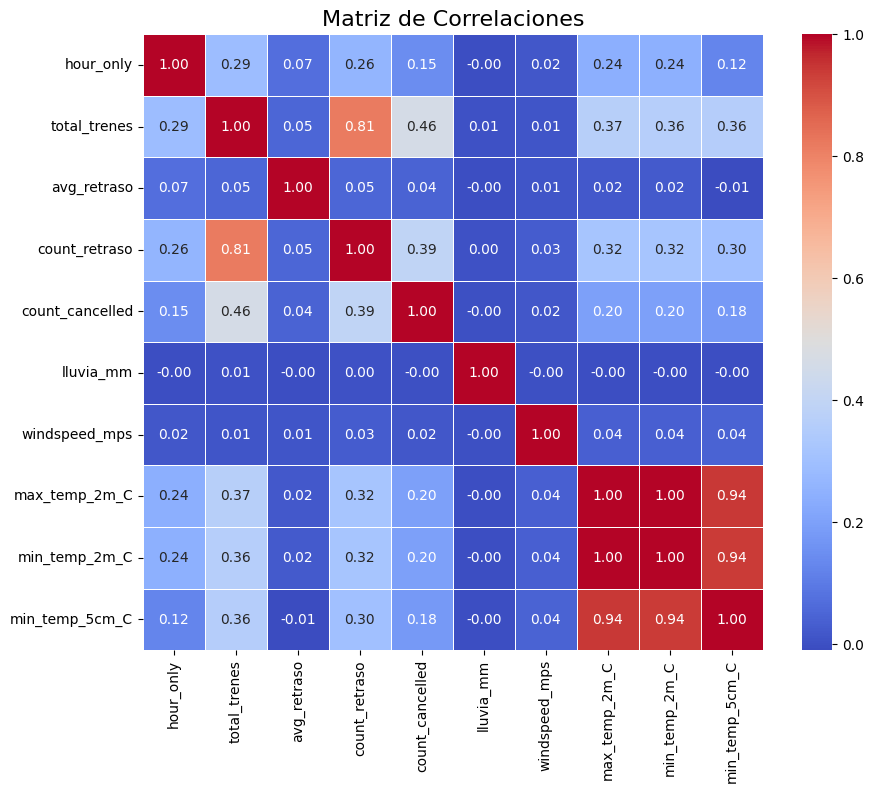

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#hay que revisar que solo se incluyan columnas numéricas  sin valores NaN
numeric_data = combined_data.select_dtypes(include=[float, int])
numeric_data = numeric_data.fillna(0) #reemplazamos nan con 0

#Hacemos el calculo de la matriz de correlación
corr_matrix = numeric_data.corr()

#Graficamos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaciones', fontsize=16)
plt.show()



Grafico de Dispersión  - Modelo KNN Retrasos

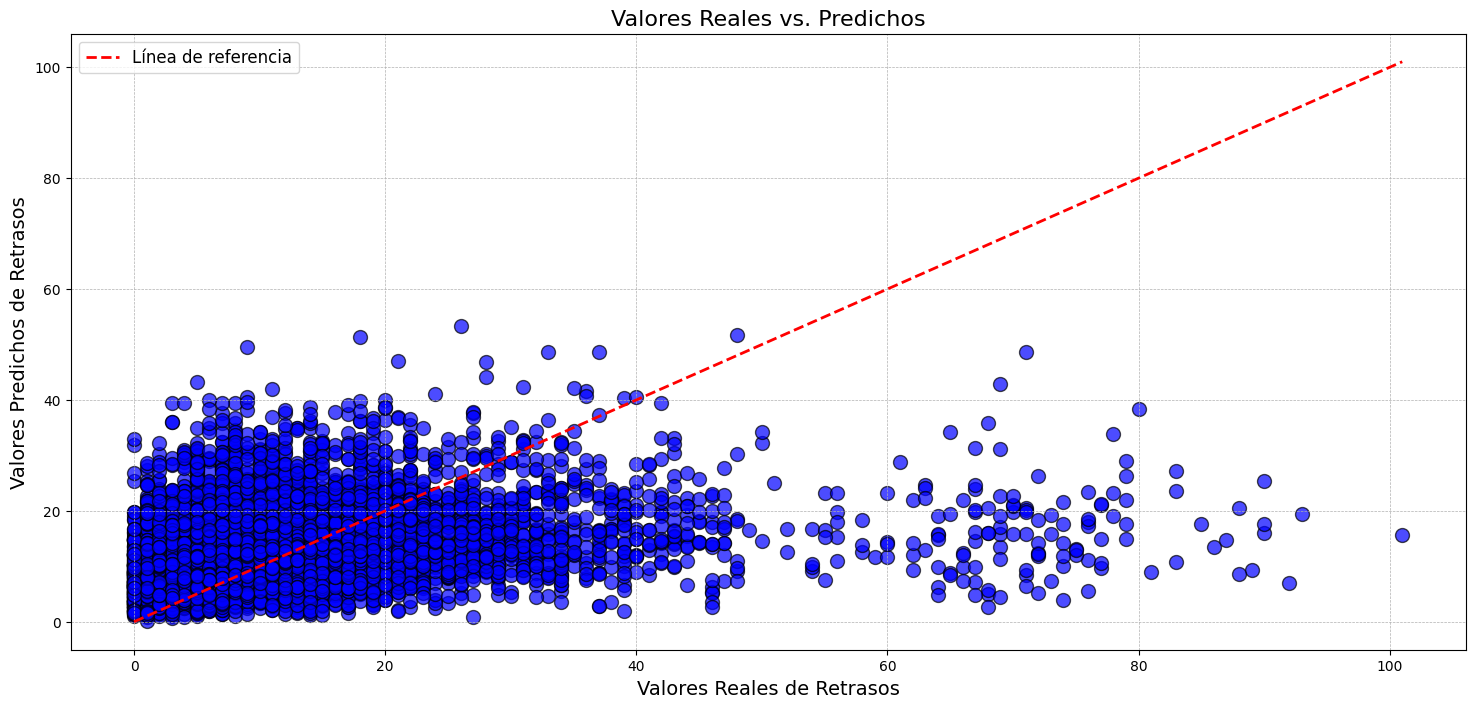

In [44]:
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura (ancho, alto)
plt.figure(figsize=(18, 8))

# Graficar los valores reales vs. predichos
plt.scatter(y_retrasos_test, y_retrasos_pred, color='blue', edgecolor='k', alpha=0.7, s=100)

# Añadir una línea de referencia (diagonal) donde los valores reales y predichos son iguales
min_val = min(y_retrasos_test.min(), y_retrasos_pred.min())
max_val = max(y_retrasos_test.max(), y_retrasos_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Línea de referencia')

# Agregar etiquetas y título con tamaños ajustados
plt.xlabel('Valores Reales de Retrasos', fontsize=14)
plt.ylabel('Valores Predichos de Retrasos', fontsize=14)
plt.title('Valores Reales vs. Predichos', fontsize=16)

# Agregar leyenda y cuadrícula
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Mostrar el gráfico
plt.show()

